In [2]:
import pandas as pd

sensus = {
    'tinggi' : [168, 180, 173, 161, 175, 165, 180, 168, 158],
    'berat' : [70, 76, 80, 82, 51, 49, 68, 53, 60],
    'jk' : [
        'pria', 'pria', 'wanita', 'pria', 'wanita', 'wanita', 'pria', 'wanita', 'pria'
    ]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,168,70,pria
1,180,76,pria
2,173,80,wanita
3,161,82,pria
4,175,51,wanita
5,165,49,wanita
6,180,68,pria
7,168,53,wanita
8,158,60,pria


Matplotlib created a temporary cache directory at C:\Users\LOQ15A~1\AppData\Local\Temp\matplotlib-xg72ilaj because the default path (C:\Users\LOQ 15APH8\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


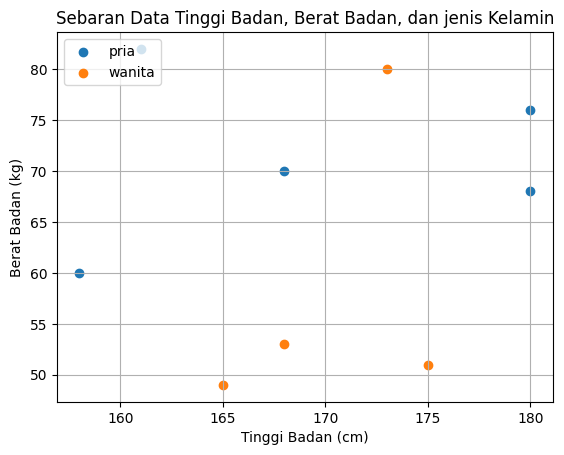

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

In [4]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[168  70]
 [180  76]
 [173  80]
 [161  82]
 [175  51]
 [165  49]
 [180  68]
 [168  53]
 [158  60]]

y_train: ['pria' 'pria' 'wanita' 'pria' 'wanita' 'wanita' 'pria' 'wanita' 'pria']


In [5]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]]


In [6]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 1 0 1 1 0 1 0]


In [7]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])

In [9]:
y_new = model.predict(X_new)



In [10]:
lb.inverse_transform(y_new)

array(['pria'], dtype='<U6')

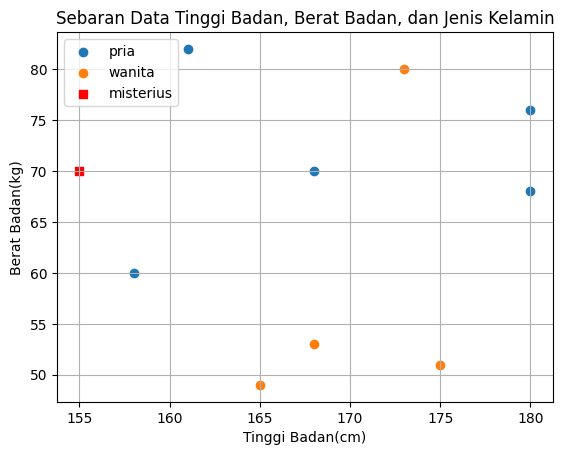

In [11]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
            berat_badan,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan(cm)')
plt.ylabel('Berat Badan(kg)')
plt.grid(True)
plt.show()

In [12]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [13]:
X_train

array([[168,  70],
       [180,  76],
       [173,  80],
       [161,  82],
       [175,  51],
       [165,  49],
       [180,  68],
       [168,  53],
       [158,  60]], dtype=int64)

In [14]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak


[13.0,
 25.709920264364882,
 20.591260281974,
 13.416407864998739,
 27.586228448267445,
 23.259406699226016,
 25.079872407968907,
 21.400934559032695,
 10.44030650891055]

In [15]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
8,158,60,pria,10.440307
0,168,70,pria,13.000000
3,161,82,pria,13.416408
2,173,80,wanita,20.591260
7,168,53,wanita,21.400935
5,165,49,wanita,23.259407
6,180,68,pria,25.079872
1,180,76,pria,25.709920
4,175,51,wanita,27.586228


In [16]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}\n')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]



In [17]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0])

In [18]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.75


In [19]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 1.0


In [20]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 0.5


In [21]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.6666666666666666


In [22]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classfication Report:\n{cls_report}')

Classfication Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [23]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 1.0


In [24]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258
